# Example 9.6: Jet Propulsion (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement



## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.kSI import *
   
air = idealgas.Properties('Air')

### Given Parameters
We now define variables to hold our known values.

In [4]:
T[1] = Quantity(-40,'degC')   # Inlet Temperature
p[1] = Quantity(35,'kPa')     # Compressor Inlet pressure
r_p = Quantity(10,' ')        # Pressure ratio
T[4] = Quantity(1000,'degC')  # Turbine inlet temperature
mdot = Quantity(50,'kg/s')    # mass flow rate
V=Vel
V[1] = Quantity(250,'m/s')

Summary();

### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Isobaric heat exchagners: Combustors
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [5]:
"Ideal Gas"
R = air.R

Summary();

#### (a) $w_{net}$

In [6]:
%%showcalc
"### 1-2) Diffuser"
"### State 1"
h[1] = air.h(T[1],p[1])
s[1] = air.s(T[1],p[1])
states.fix(1,air) # hide

"### 1-2) Isentropic Ram"
h[2] = h[1] + Vel[1]**2/(2)
s[2] = s[1]
states.fix(2,air) # hide

"### 2-3) Isentropic compression"
p[3] = p[2]*r_p
s[3] = s[2]
states.fix(3,air) # hide
Wdot_2_to_3 = mdot*(h[2]-h[3])

"### 3-4) Combustion"
p[4]=p[3]
states.fix(4,air) # hide
Qdot_3_to_4 = mdot*(h[4]-h[3])

"### 4-5) Turbine"
Wdot_4_to_3 = -Wdot_2_to_3
h[5] = h[4] - Wdot_4_to_3/mdot
s[5] = s[4]
states.fix(5,air) # hide

"### 5-6) Isentropic Expansion"
p[6] = p[1]
s[6] = s[5]
states.fix(6,air) # hide
Vel[6] = (2*(h[5]-h[6]))**0.5

### 1-2) Diffuser
### State 1
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ air }{ h } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ h } }\left( 233.15\ \mathrm{K}, 35\ \mathrm{kPa} \right) = -69.491\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ air }{ s } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 233.15\ \mathrm{K}, 35\ \mathrm{kPa} \right) = 6.7561\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Fixing state 1 using previously defined values.
### 1-2) Isentropic Ram
\begin{align}
  {h}_{ 2 } &=  {h}_{ 1 } + \frac{ {{Vel}_{ 1 }}^{2} }{ 2 } \\
    &= -69.491\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{ {\left(250\ \frac{\mathrm{m}}{\mathrm{s}} \right)}^{2} }{ 2 }\\
    &= -38.241\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 2 } &=  {s}_{ 1 }  = 6.7561\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 2 using previously defined values.
### 2-3) Isentropic compression
\begin{align}
  {p}_{ 3 } &=   {p}_{ 2 }  \cdot  r_{p}  \\
    &=  54.25\ \mathrm{kPa}  \cdot  10 \\
    &= 542.5\ \mathrm{kPa}
\end{align}

\begin{align}
  {s}_{ 3 } &=  {s}_{ 2 }  = 6.7561\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 3 using previously defined values.
\begin{align}
  \dot{W}_{2\to{}3} &=   \dot{m}  \cdot  \left(  {h}_{ 2 } - {h}_{ 3 }  \right)  \\
    &=  50\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  -38.241\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 208.56\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= -1.234\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}

### 3-4) Combustion
\begin{align}
  {p}_{ 4 } &=  {p}_{ 3 }  = 542.5\ \mathrm{kPa} 
\end{align}

Fixing state 4 using previously defined values.
\begin{align}
  \dot{Q}_{3\to{}4} &=   \dot{m}  \cdot  \left(  {h}_{ 4 } - {h}_{ 3 }  \right)  \\
    &=  50\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  1061.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 208.56\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 4.2624\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}

### 4-5) Turbine
\begin{align}
  \dot{W}_{4\to{}3} &=  -\dot{W}_{2\to{}3}  = -\left( -1.234\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}} \right) = 1.234\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}

\begin{align}
  {h}_{ 5 } &=   {h}_{ 4 } - \frac{ \dot{W}_{4\to{}3} }{ \dot{m} }  \\
    &=  1061.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} - \frac{ 1.234\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}} }{ 50\ \frac{\mathrm{kg}}{\mathrm{s}} } \\
    &= 814.23\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 5 } &=  {s}_{ 4 }  = 7.769\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 5 using previously defined values.
### 5-6) Isentropic Expansion
\begin{align}
  {p}_{ 6 } &=  {p}_{ 1 }  = 35\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ 6 } &=  {s}_{ 5 }  = 7.769\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 6 using previously defined values.
\begin{align}
  {Vel}_{ 6 } &=  {\left( 2  \cdot  \left(  {h}_{ 5 } - {h}_{ 6 }  \right) \right)}^{0.5} \\
    &= {\left( 2  \cdot  \left(  814.23\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 336.79\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \right)}^{0.5}\\
    &= 977.18\ \frac{\mathrm{m}}{\mathrm{s}}
\end{align}



#### (b) Net Thrust

In [7]:
%%showcalc
F_Net = (mdot*(V[6]-V[1])).to('N')

\begin{align}
  F_{Net} &=   \dot{m}  \cdot  \left(  {V}_{ 6 } - {V}_{ 1 }  \right)  \\
    &=  50\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  977.18\ \frac{\mathrm{m}}{\mathrm{s}} - 250\ \frac{\mathrm{m}}{\mathrm{s}}  \right) \\
    &= 3.6359\times 10^{4}\ \mathrm{N}
\end{align}



#### (c) Propulsive Power

In [8]:
%%showcalc
Wdot_P = (F_Net*V[1]).to('W')


\begin{align}
  \dot{W}_{P} &=   F_{Net}  \cdot  {V}_{ 1 }  \\
    &=  3.6359\times 10^{4}\ \mathrm{N}  \cdot  250\ \frac{\mathrm{m}}{\mathrm{s}} \\
    &= 9.0897\times 10^{6}\ \mathrm{W}
\end{align}



#### (d) Propulsive Efficiency

In [9]:
%%showcalc
eta_P = (Wdot_P/Qdot_3_to_4).to('')

\begin{align}
  \eta_{P} &=  \frac{ \dot{W}_{P} }{ \dot{Q}_{3\to{}4} } \\
    &= \frac{ 9.0897\times 10^{6}\ \mathrm{W} }{ 4.2624\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{s}} }\\
    &= 0.21326
\end{align}



#### Summary of Results

In [10]:
Summary()
Summary(['F_Net','Wdot_P','eta_P']);

#### Sketch a $p$−$v$ diagram for the cycle

##### Linear Scale

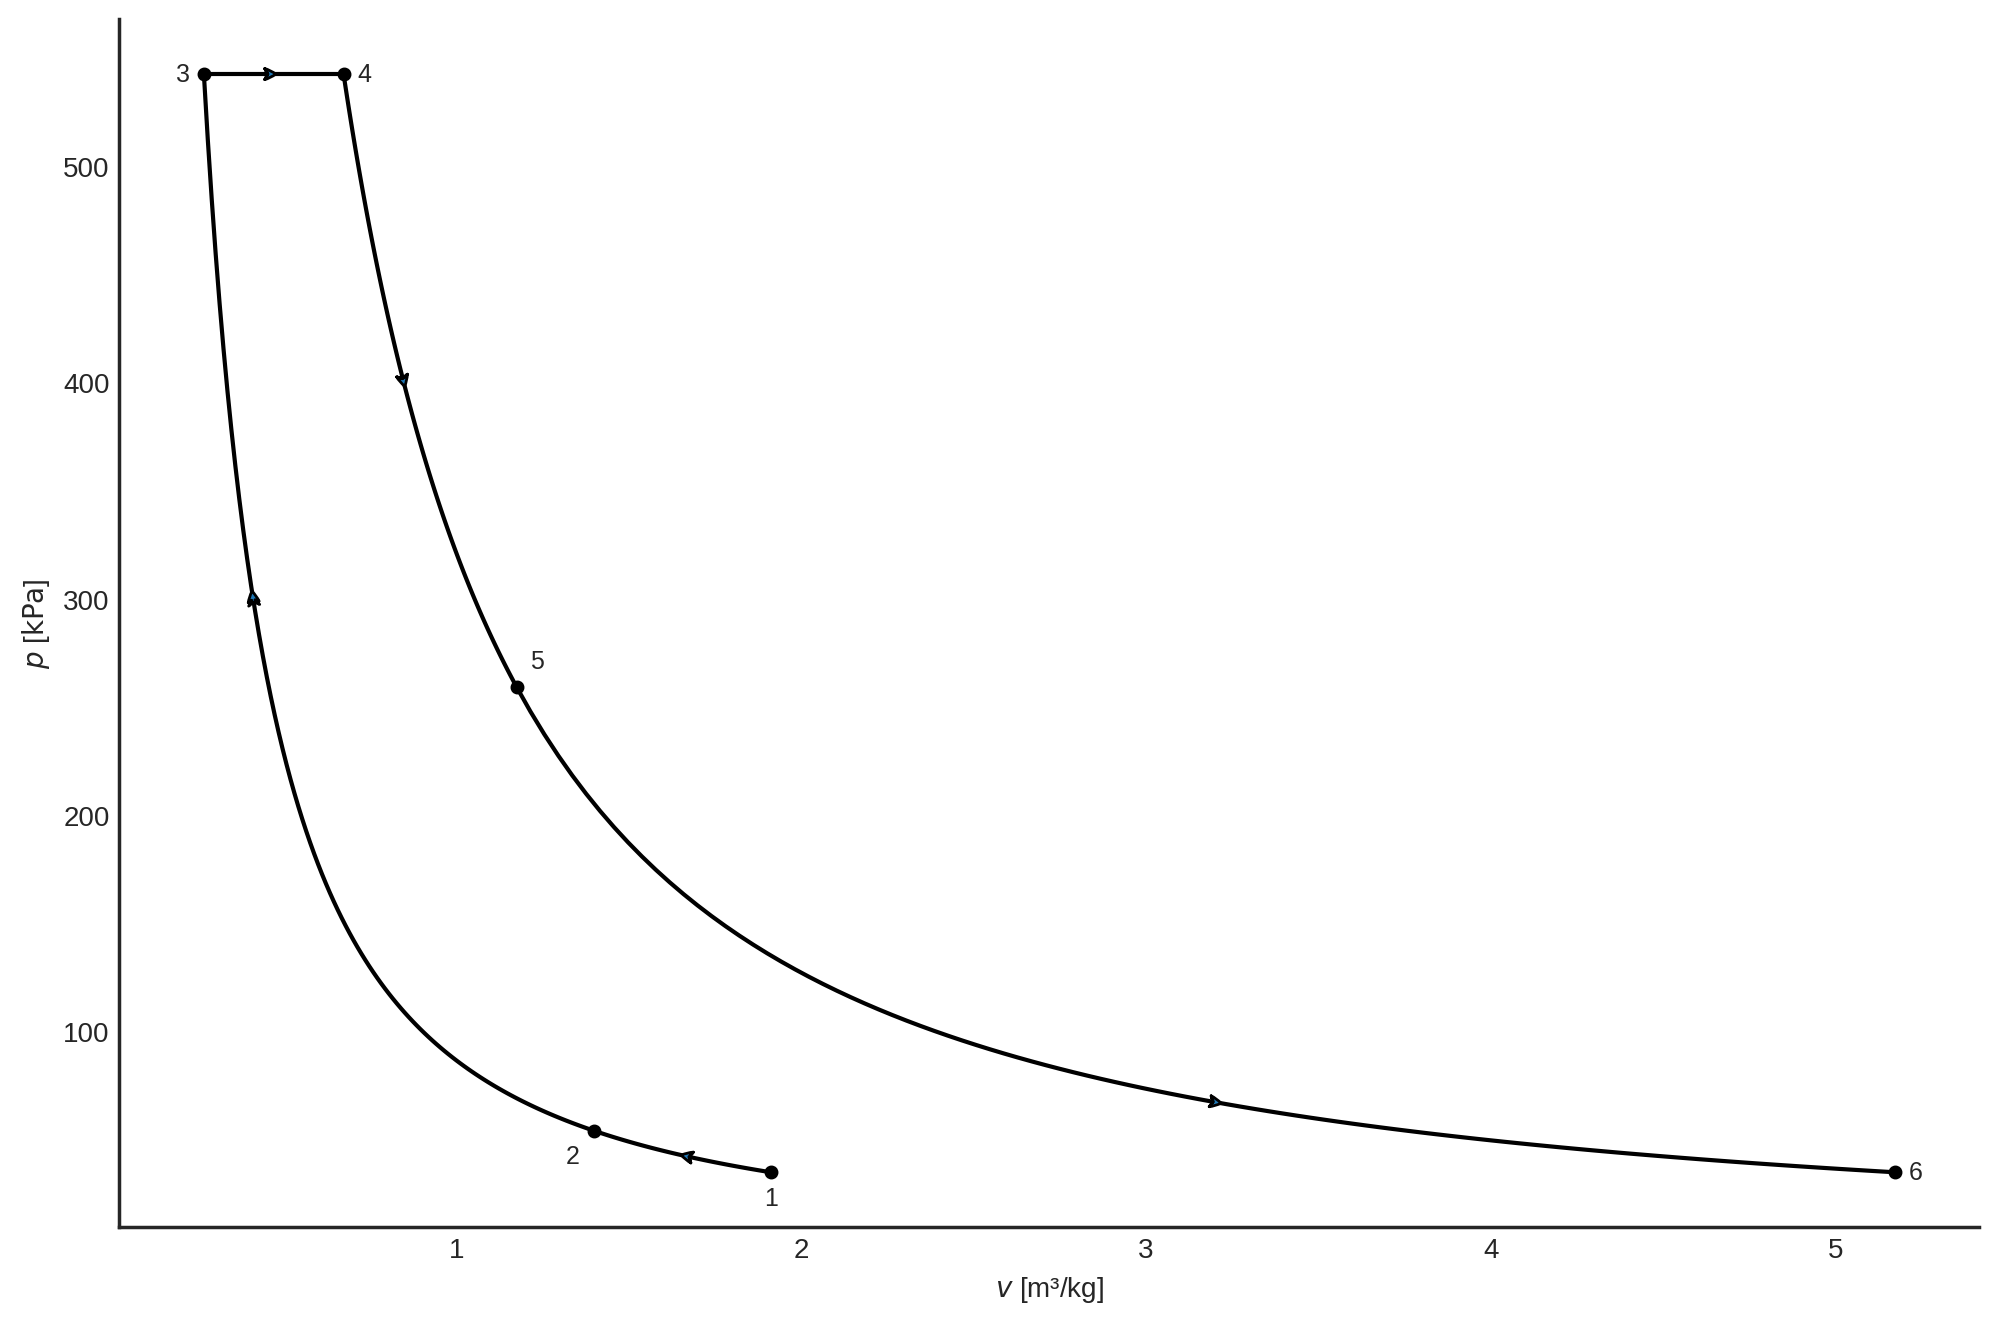

In [11]:
pv = air.pv_diagram()

# The following loop plots and labels a point for each state
p[5] = air.p(T[5],v[5])

pv.plot_state(states[1], label_loc='south')
pv.plot_state(states[2], label_loc='south west')
pv.plot_state(states[3], label_loc='west')
pv.plot_state(states[4], label_loc='east')
pv.plot_state(states[5], label_loc='north east')
pv.plot_state(states[6], label_loc='east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic','nonideal'
pv.plot_process(states[1],states[2], path='isentropic') # 1->2
pv.plot_process(states[2],states[3], path='isentropic') # 2->3
pv.plot_process(states[3],states[4], path='isobaric') # 3->4
pv.plot_process(states[4],states[5], path='isentropic') # 4->5
pv.plot_process(states[5],states[6], path='isentropic'); # 5->6


##### Log-Log Scale

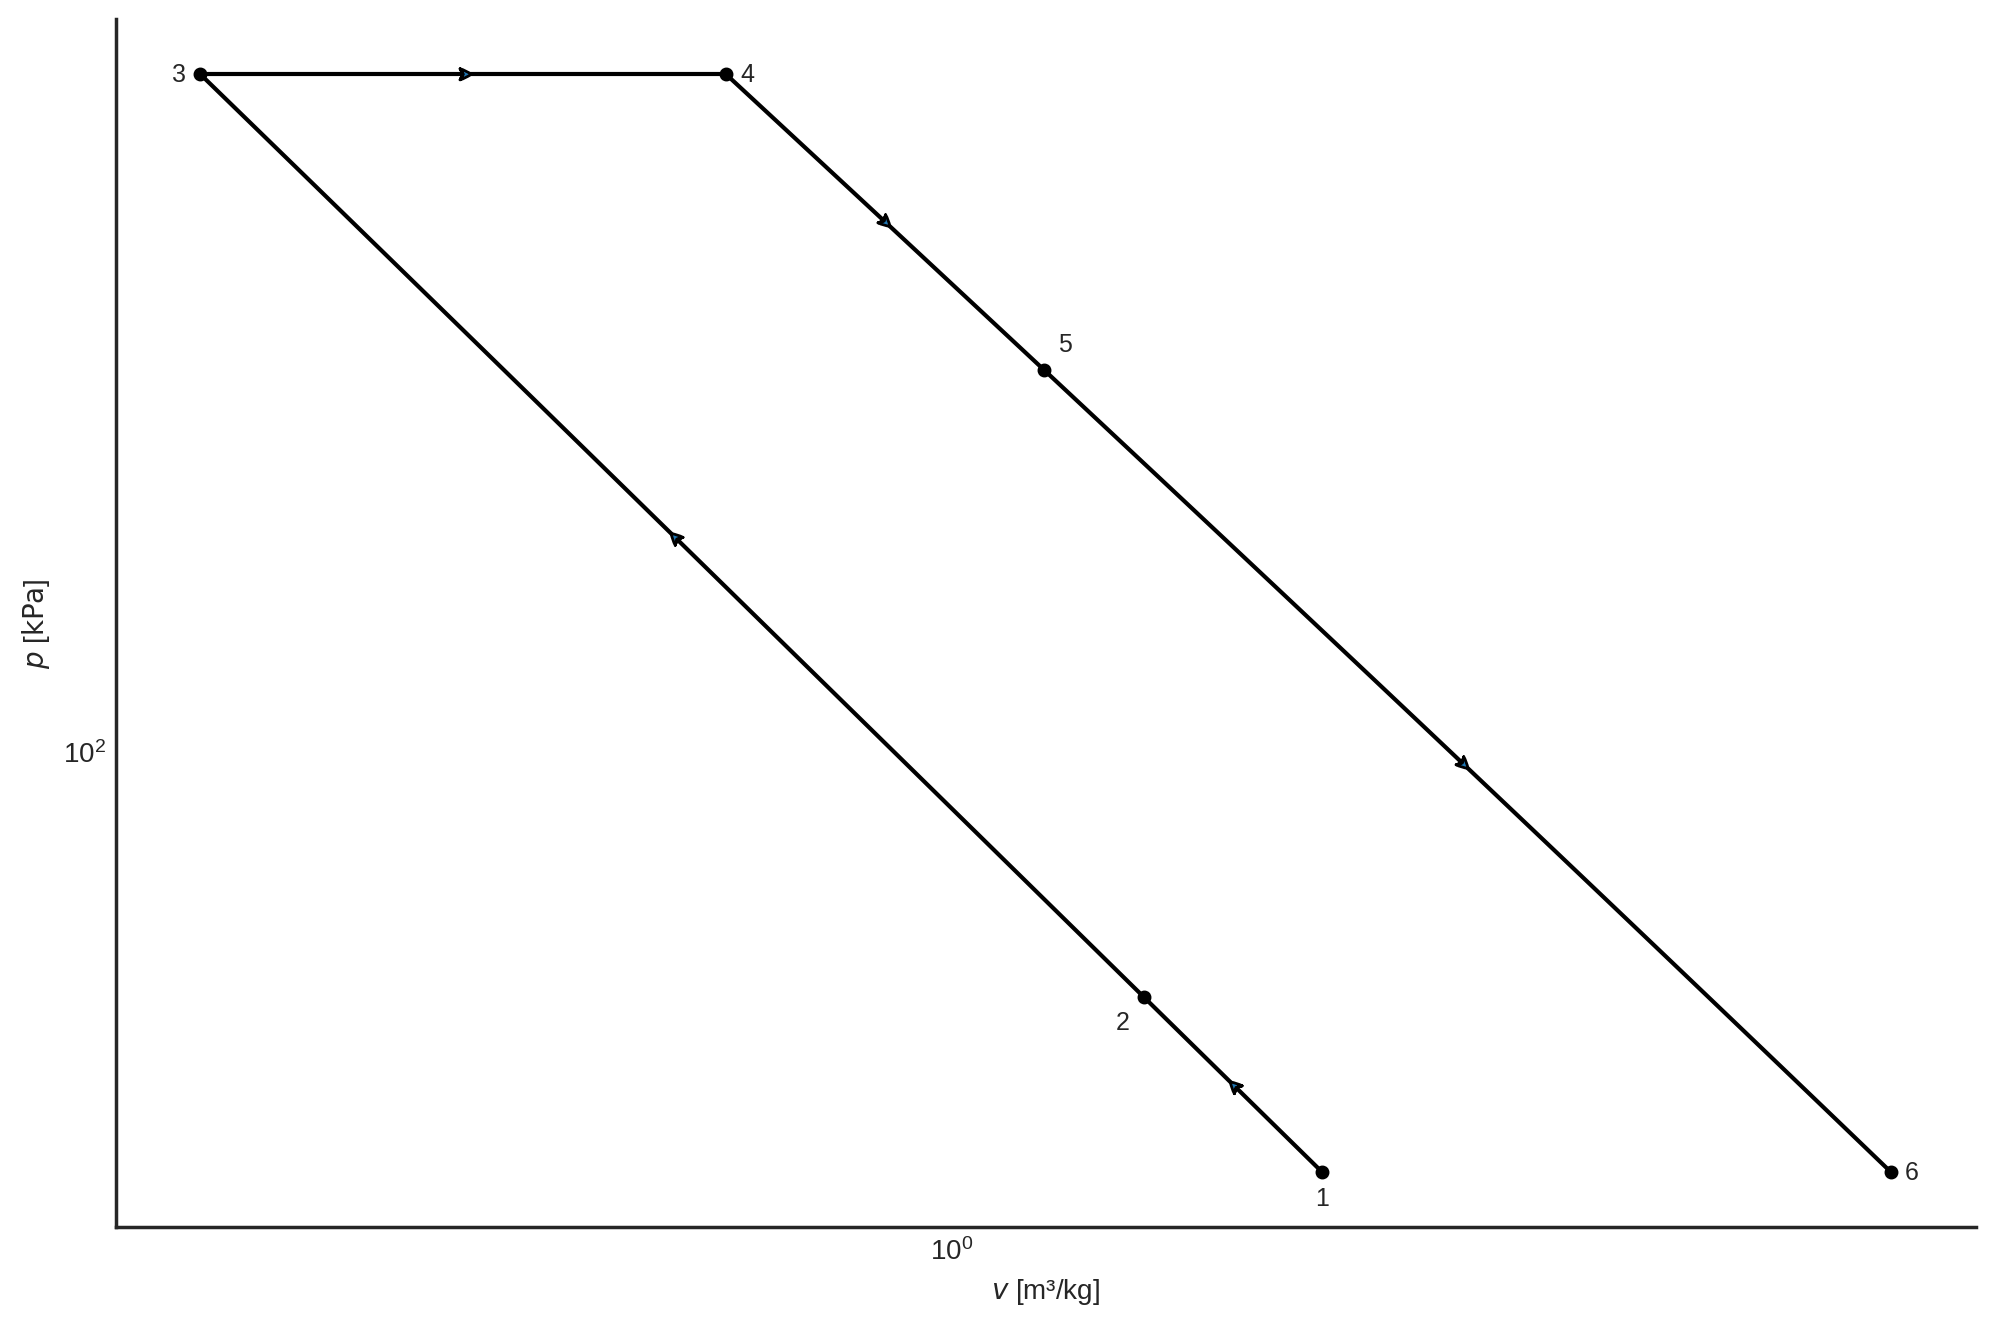

In [12]:
pv = air.pv_diagram(log_x=True,log_y=True)

# The following loop plots and labels a point for each state
p[5] = air.p(T[5],v[5])

pv.plot_state(states[1], label_loc='south')
pv.plot_state(states[2], label_loc='south west')
pv.plot_state(states[3], label_loc='west')
pv.plot_state(states[4], label_loc='east')
pv.plot_state(states[5], label_loc='north east')
pv.plot_state(states[6], label_loc='east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic','nonideal'
pv.plot_process(states[1],states[2], path='isentropic') # 1->2
pv.plot_process(states[2],states[3], path='isentropic') # 2->3
pv.plot_process(states[3],states[4], path='isobaric') # 3->4
pv.plot_process(states[4],states[5], path='isentropic') # 4->5
pv.plot_process(states[5],states[6], path='isentropic'); # 5->6


#### $T$-$s$ diagram

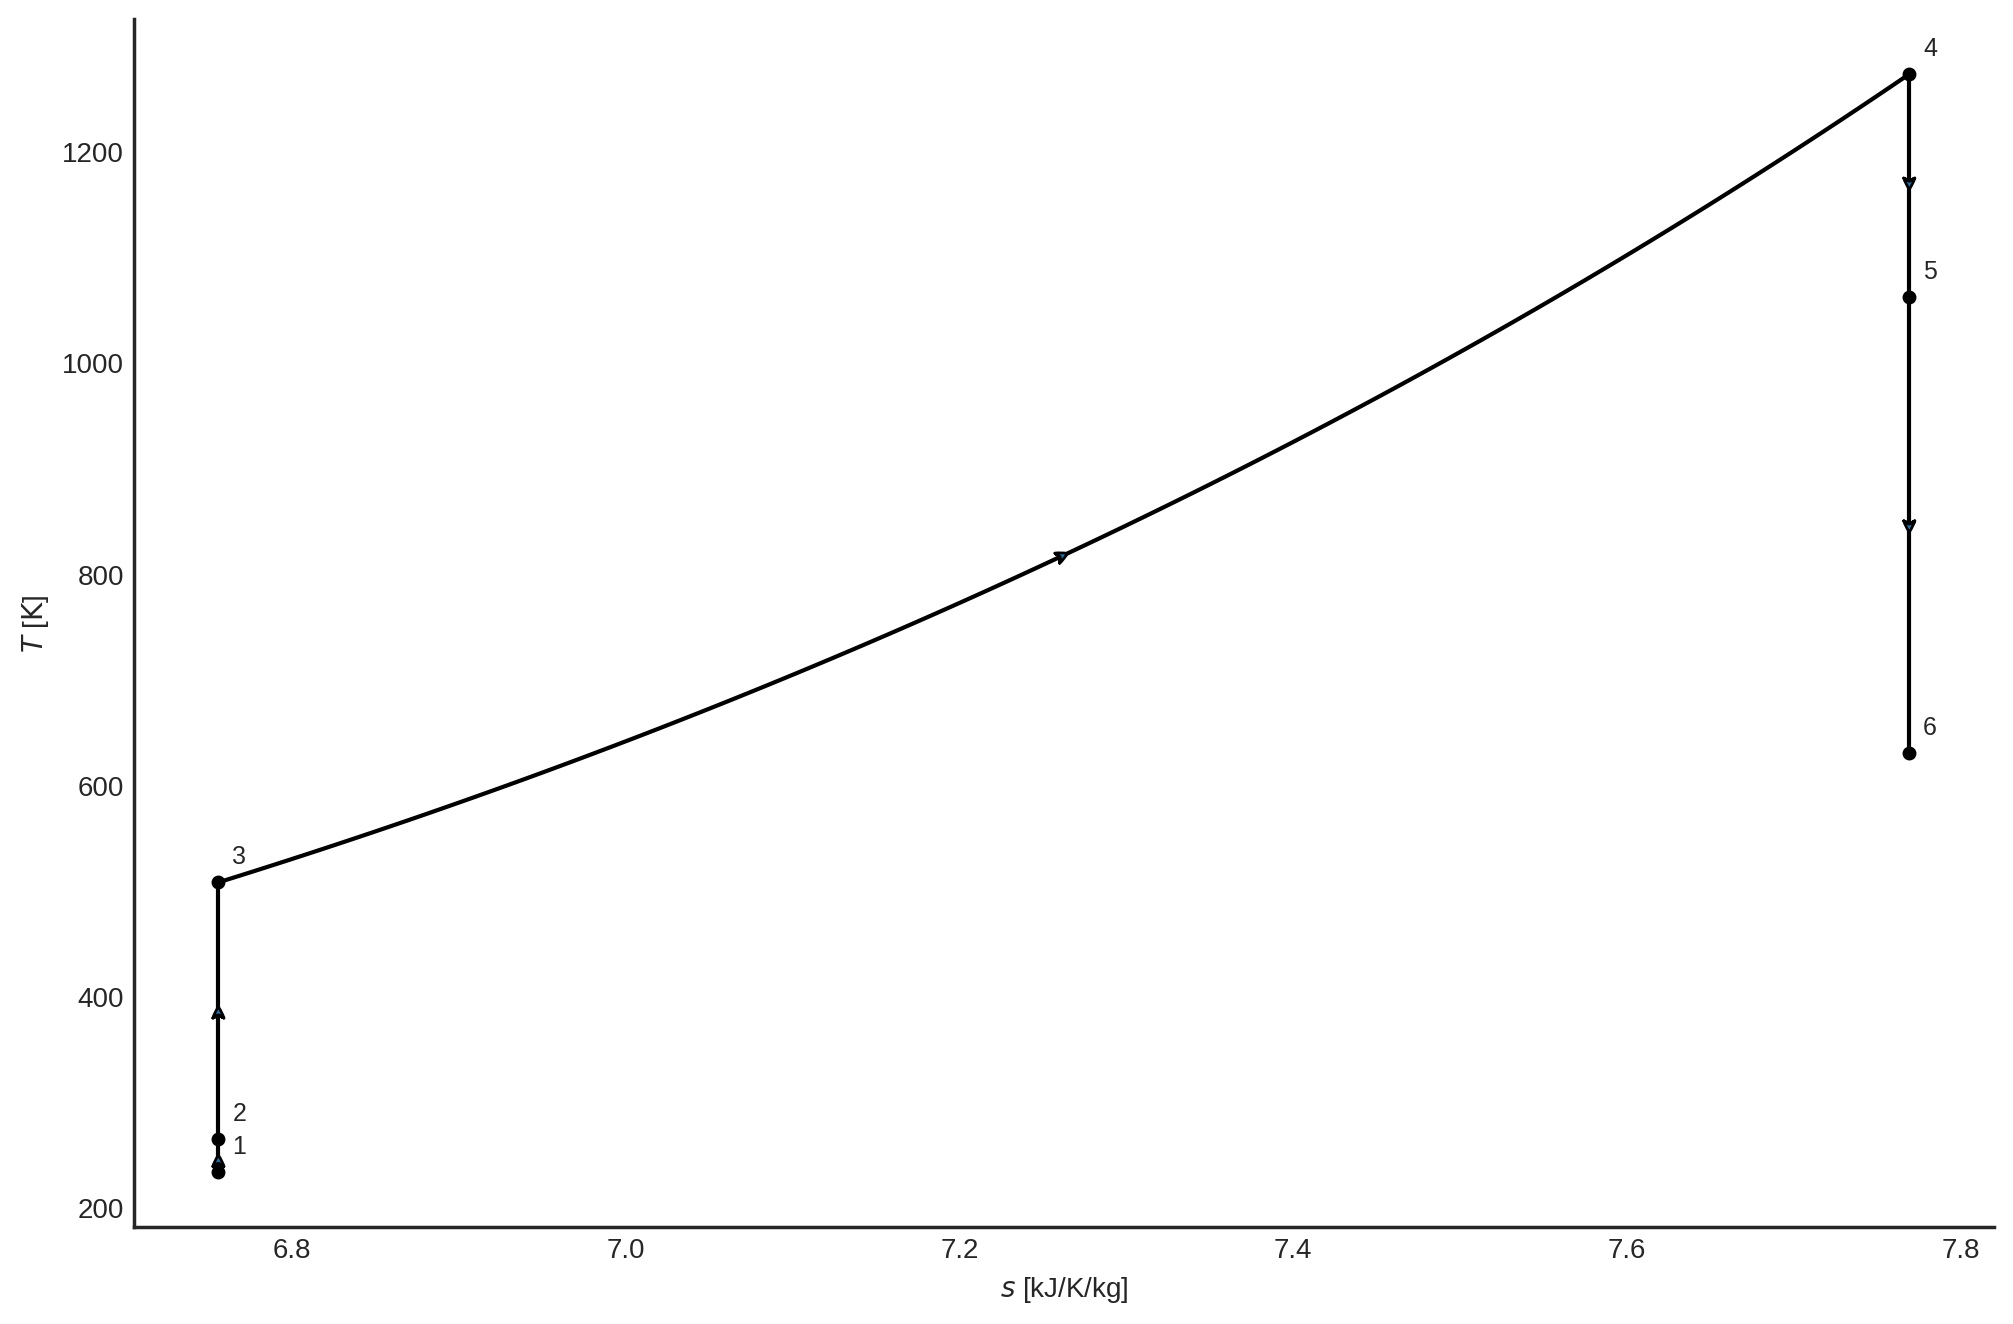

In [13]:
Ts = air.Ts_diagram()
# The following loop plots and labels a point for each state
for state in [1,2,3,4,5,6]:
    Ts.plot_state(states[state], label_loc='north east')

# Enter an appropriate path descriptor for each process, i.e. 'isothermal','isobaric','isochoric','isenthalpic','isentropic'
Ts.plot_process(states[1],states[2], path='isentropic') # 1->2
Ts.plot_process(states[2],states[3], path='isentropic') # 2->3
Ts.plot_process(states[3],states[4], path='isobaric') # 3->4
Ts.plot_process(states[4],states[5], path='isentropic') # 4->5
Ts.plot_process(states[5],states[6], path='isentropic'); # 5->6

In [0]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

!jupyter nbconvert --no-prompt --no-input --to html_embed 'Ex9.6 Jet-Propulsion (Air-Standard)'